In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [40]:
#California housing
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [41]:
housingcolumnnames = ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude']

In [42]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [43]:
housingdf = pd.DataFrame(housing.data, columns = housingcolumnnames)
housingdf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [44]:
housingdf.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31


In [45]:
housingtargetsdf = pd.DataFrame(housing.target ,columns = ['MedianPropertyValx100k'])
housingtargetsdf

,MedianPropertyValx100k
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [46]:
housingtargetsdf.describe().round(2)

,MedianPropertyValx100k
count,20640.00
mean,2.07
std,1.15
min,0.15
25%,1.20
50%,1.80
75%,2.65
max,5.00


<AxesSubplot: ylabel='Count'>

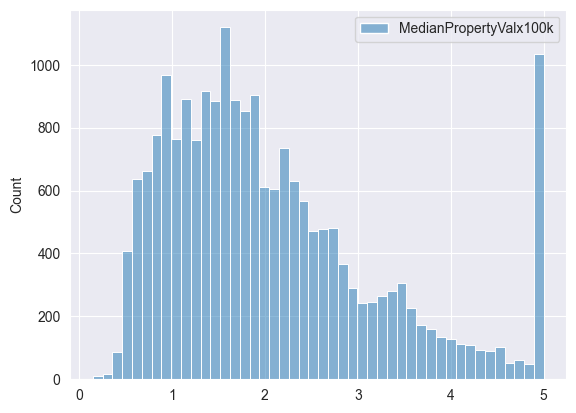

In [47]:
sns.histplot(housingtargetsdf)

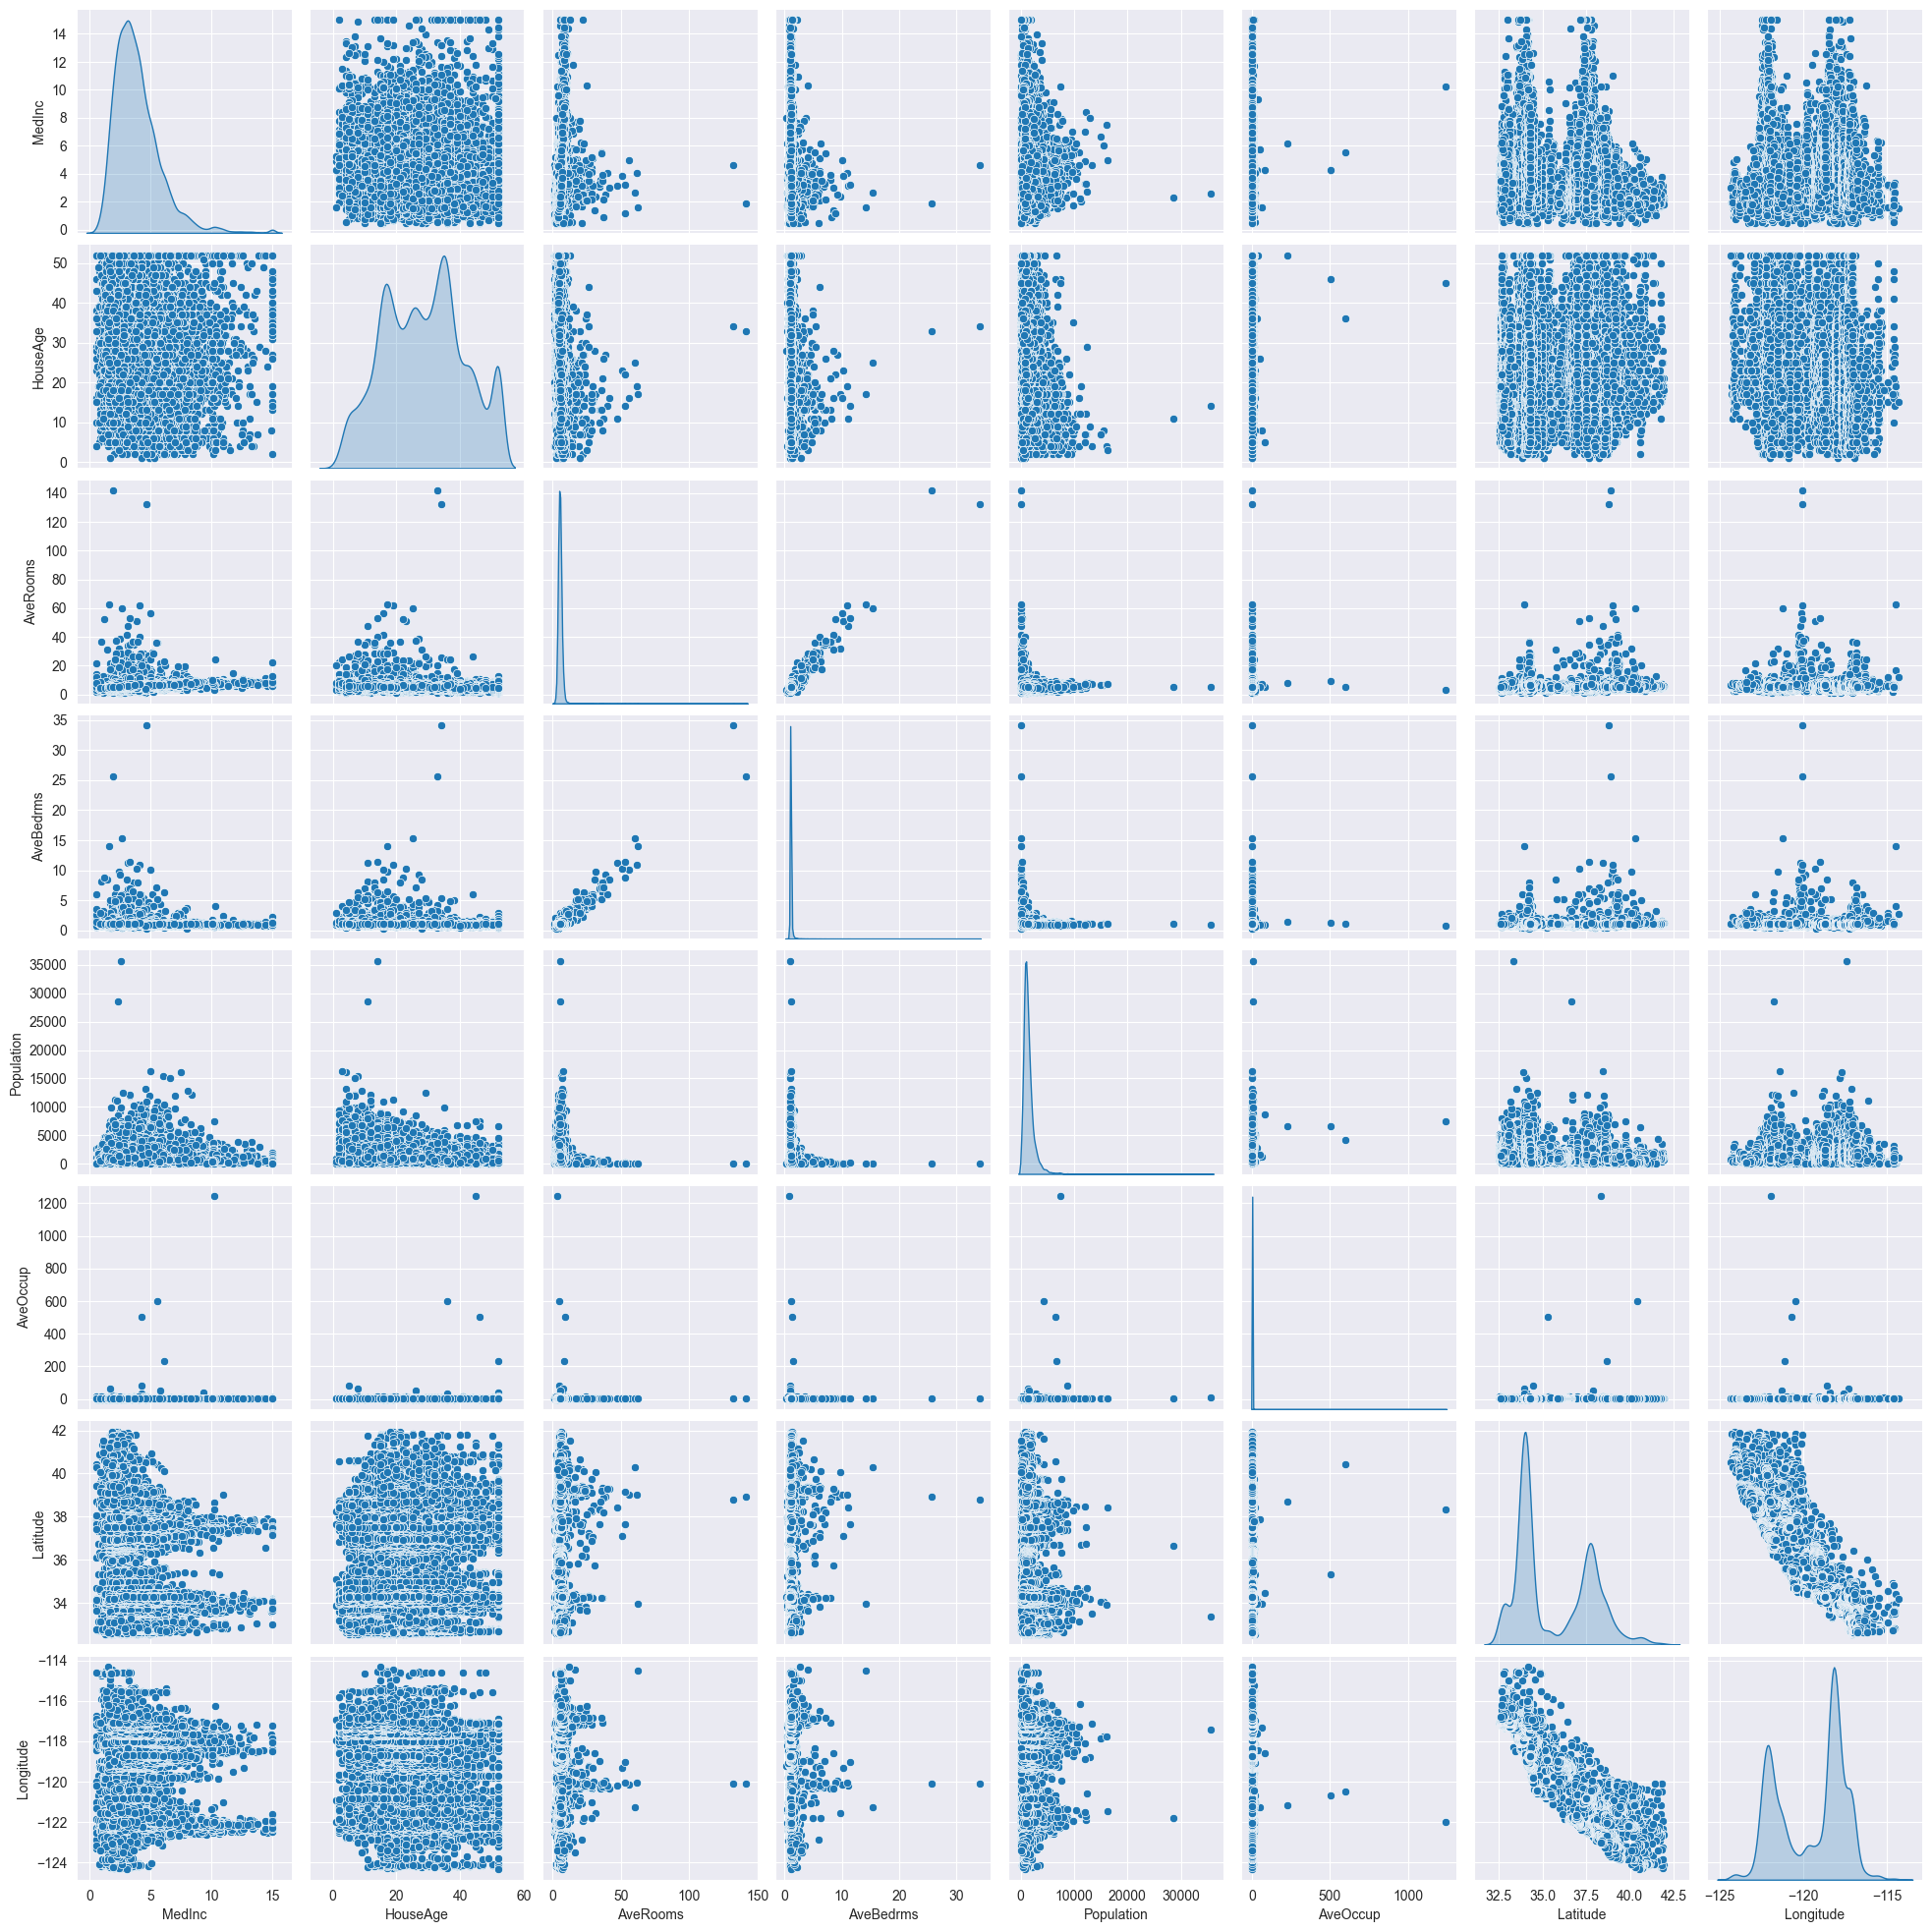

In [48]:
sns.pairplot(housingdf, diag_kind='kde')

In [49]:
corr = housingdf.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


<AxesSubplot: >

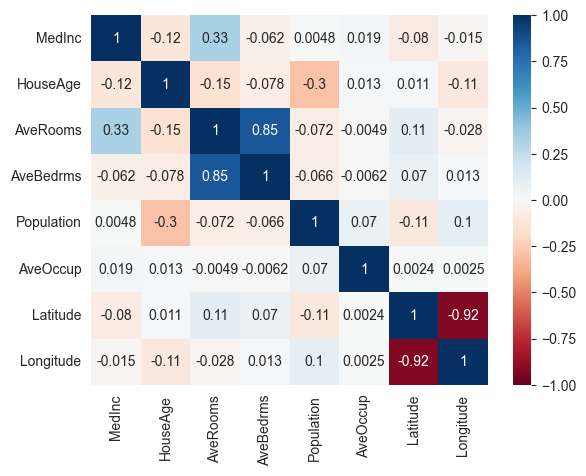

In [50]:
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

In [51]:
# Here we partition our data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(housingdf, housingtargetsdf, test_size=0.3, random_state = 15)

In [52]:
reg = LinearRegression()
regmodel= reg.fit(X_train, y_train)

Coefficients: 
 [[ 4.33412437e-01  9.78668817e-03 -1.01909893e-01  5.97950494e-01
  -3.41462328e-06 -3.23919601e-03 -4.15863154e-01 -4.24274866e-01]]


<AxesSubplot: >

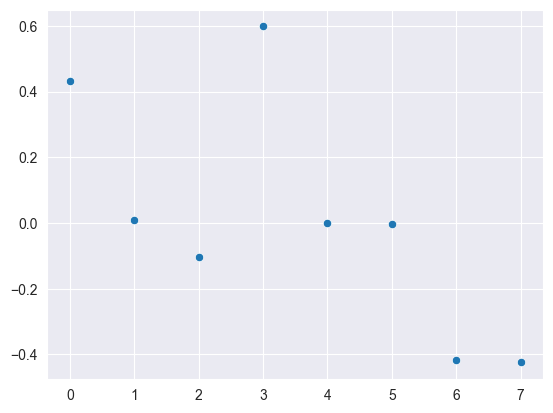

In [53]:
print('Coefficients: \n', regmodel.coef_)
sns.scatterplot(x=list(range(0,len(regmodel.coef_[0]))),y=regmodel.coef_[0])

In [54]:
housingcolumnnames

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [55]:
yhat_train_predict = reg.predict(X_train)
yhat_test_predict = reg.predict(X_test)

In [56]:
print('\nTrain Mean squared error: %.2f' % mean_squared_error(y_train, yhat_train_predict))
print('\nTest Mean squared error: %.2f' % mean_squared_error(y_test, yhat_test_predict))


Train Mean squared error: 0.52

Test Mean squared error: 0.53


### Normalize

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler() #normalizer
housingnormdf = pd.DataFrame(scaler.fit_transform(housingdf), columns=housingcolumnnames)
housingnormdf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163
...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513,0.324701
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,0.738576,0.312749
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200,0.311753
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200,0.301793


In [59]:
housingnormdf.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,0.23,0.54,0.03,0.02,0.04,0.00,0.33,0.48
std,0.13,0.25,0.02,0.01,0.03,0.01,0.23,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.14,0.33,0.03,0.02,0.02,0.00,0.15,0.25
50%,0.21,0.55,0.03,0.02,0.03,0.00,0.18,0.58
75%,0.29,0.71,0.04,0.02,0.05,0.00,0.55,0.63
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [60]:
housingtargetsnormdf = pd.DataFrame(scaler.fit_transform(housingtargetsdf), columns=['MedianPropertyValx100k'])
housingtargetsnormdf

,MedianPropertyValx100k
0,0.902266
1,0.708247
2,0.695051
3,0.672783
4,0.674638
...,...
20635,0.130105
20636,0.128043
20637,0.159383
20638,0.143713


In [61]:
housingtargetsnormdf.describe().round(2)

,MedianPropertyValx100k
count,20640.00
mean,0.40
std,0.24
min,0.00
25%,0.22
50%,0.34
75%,0.51
max,1.00


In [62]:
# Here we partition our data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(housingnormdf, housingtargetsnormdf, test_size=0.3, random_state = 15)

In [63]:
reg = LinearRegression()
regmodel= reg.fit(X_train, y_train)

Coefficients: 
 [[ 1.29578167  0.10291114 -2.96405146  4.15892374 -0.02511956 -0.82992603
  -0.80685694 -0.87828909]]


<AxesSubplot: >

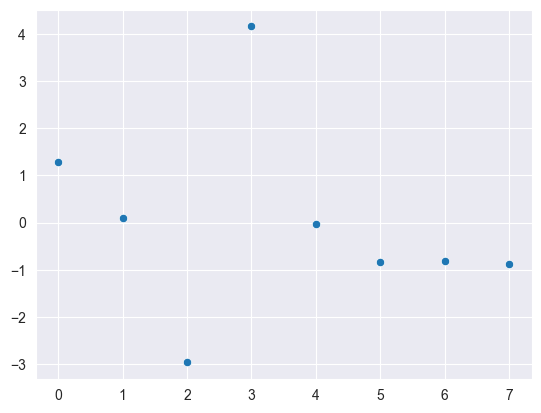

In [64]:
print('Coefficients: \n', regmodel.coef_)
sns.scatterplot(x=list(range(0,len(regmodel.coef_[0]))),y=regmodel.coef_[0])

In [65]:
housingcolumnnames

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

### Standardization

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()
housingstddf = pd.DataFrame(scaler.fit_transform(housingdf), columns=housingcolumnnames)
housingstddf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626


In [68]:
housingstddf.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.77,-2.20,-1.85,-1.61,-1.26,-0.23,-1.45,-2.39
25%,-0.69,-0.85,-0.40,-0.19,-0.56,-0.06,-0.80,-1.11
50%,-0.18,0.03,-0.08,-0.10,-0.23,-0.02,-0.64,0.54
75%,0.46,0.66,0.25,0.01,0.26,0.02,0.97,0.78
max,5.86,1.86,55.16,69.57,30.25,119.42,2.96,2.63


In [69]:
housingtargetsstddf = pd.DataFrame(scaler.fit_transform(housingtargetsdf), columns=['MedianPropertyValx100k'])
housingtargetsstddf

,MedianPropertyValx100k
0,2.129631
1,1.314156
2,1.258693
3,1.165100
4,1.172900
...,...
20635,-1.115804
20636,-1.124470
20637,-0.992746
20638,-1.058608


In [70]:
housingtargetsstddf.describe().round(2)

,MedianPropertyValx100k
count,20640.00
mean,0.00
std,1.00
min,-1.66
25%,-0.76
50%,-0.24
75%,0.50
max,2.54


In [71]:
# Here we partition our data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(housingstddf, housingtargetsstddf, test_size=0.3, random_state = 15)

In [72]:
reg = LinearRegression()
regmodel= reg.fit(X_train, y_train)

Coefficients: 
 [[ 0.71355082  0.10673796 -0.21850286  0.24556845 -0.00335102 -0.02915401
  -0.76975533 -0.73663817]]


<AxesSubplot: >

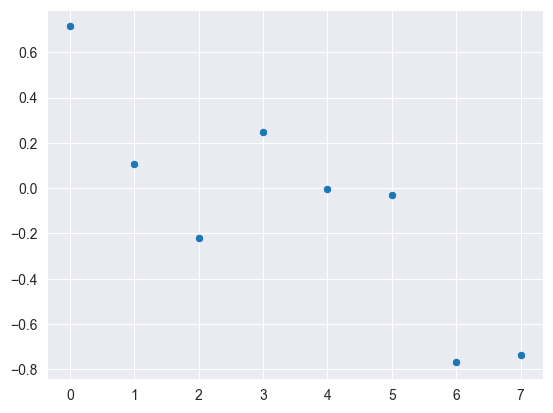

In [73]:
print('Coefficients: \n', regmodel.coef_)
sns.scatterplot(x=list(range(0,len(regmodel.coef_[0]))),y=regmodel.coef_[0])

In [74]:
housingcolumnnames

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

### Tests for normality

In [75]:
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot

MedInc


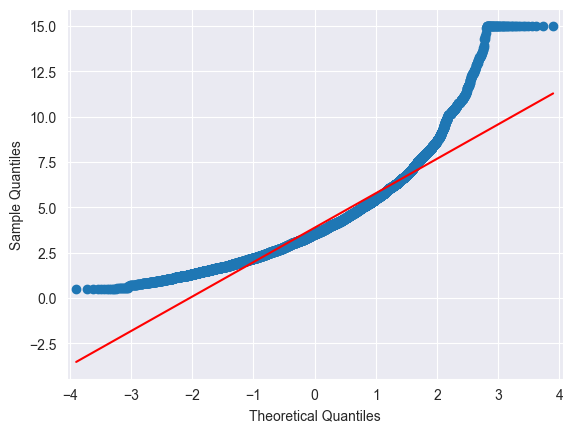

HouseAge


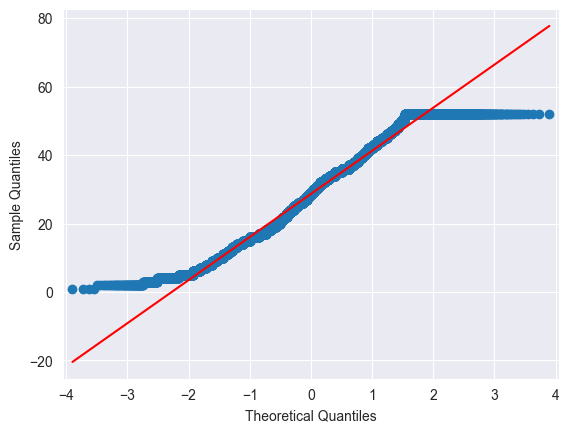

AveRooms


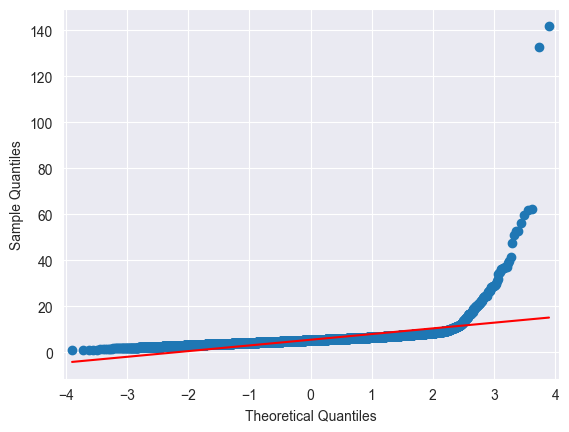

AveBedrms


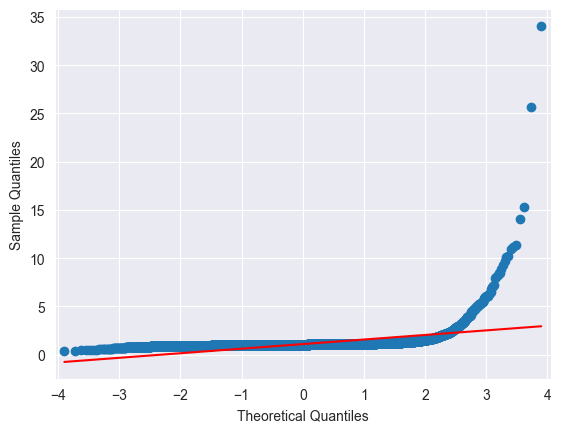

Population


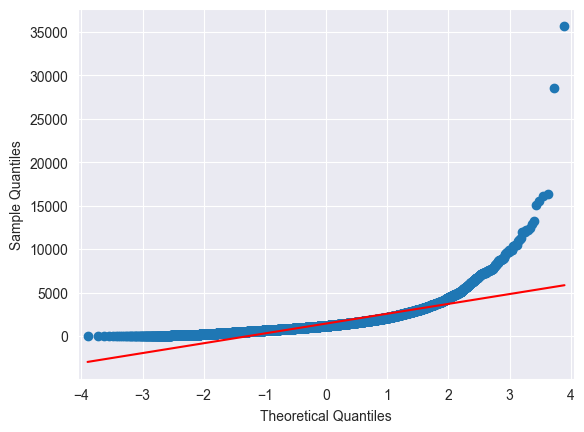

AveOccup


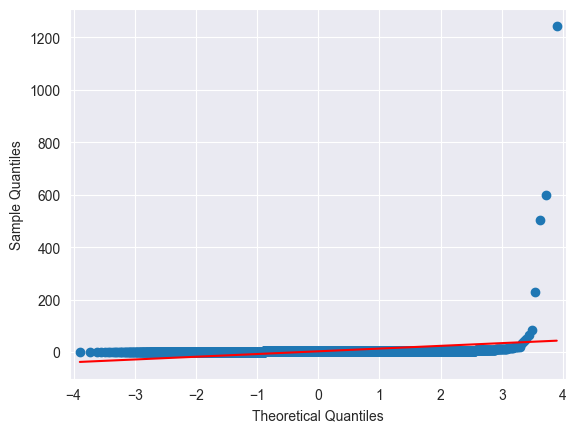

Latitude


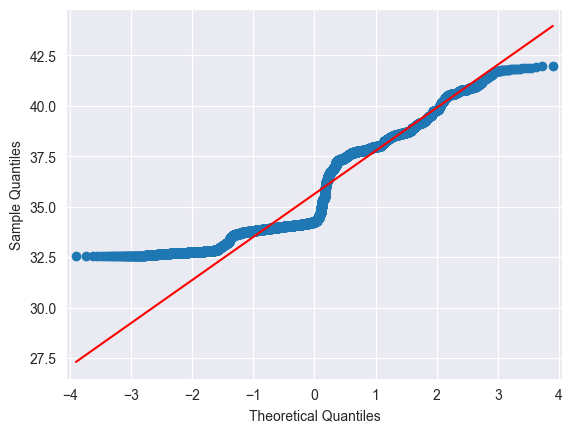

Longitude


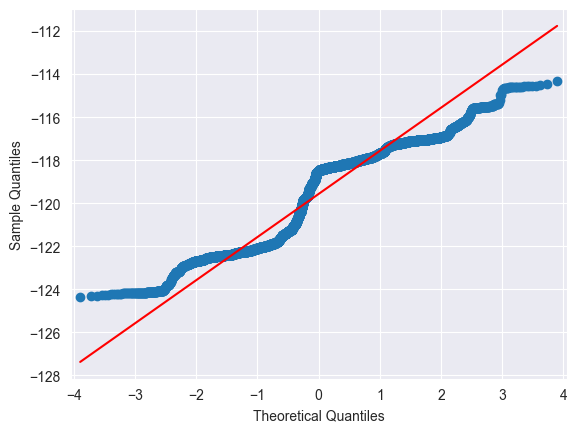

In [105]:
for columnname in housingcolumnnames:
    print(columnname)
    qqplot(housingdf[columnname], line='s')
    plt.show()

In [77]:
from scipy.stats import shapiro

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html <br>
if our p-value < 0.05 then our data is not normally distributed

In [78]:
for columnname in housingcolumnnames:
    print(columnname)
    print(shapiro(housingdf[columnname]))

MedInc
ShapiroResult(statistic=0.8932322859764099, pvalue=0.0)
HouseAge
ShapiroResult(statistic=0.9782373905181885, pvalue=0.0)
AveRooms
ShapiroResult(statistic=0.42570000886917114, pvalue=0.0)
AveBedrms
ShapiroResult(statistic=0.16039276123046875, pvalue=0.0)
Population
ShapiroResult(statistic=0.7133156657218933, pvalue=0.0)
AveOccup
ShapiroResult(statistic=0.015914857387542725, pvalue=0.0)
Latitude
ShapiroResult(statistic=0.8771096467971802, pvalue=0.0)
Longitude
ShapiroResult(statistic=0.8969986438751221, pvalue=0.0)


c:\users\gerri\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [79]:
print(shapiro(housingtargetsdf.MedianPropertyValx100k))

ShapiroResult(statistic=0.9123021364212036, pvalue=0.0)


### Encoding

In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
housingtargetsdf.MedianPropertyValx100k.value_counts()

5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.59200      1
0.54900      1
3.77600      1
0.81200      1
0.47000      1
Name: MedianPropertyValx100k, Length: 3842, dtype: int64

In [82]:
myle = LabelEncoder()
housingtargetsdf['EncodedMedianPropertyValx100k'] = myle.fit_transform(housingtargetsdf.MedianPropertyValx100k)
housingtargetsdf

,MedianPropertyValx100k,EncodedMedianPropertyValx100k
0,4.526,3665
1,3.585,3074
2,3.521,3017
3,3.413,2917
4,3.422,2925
...,...,...
20635,0.781,366
20636,0.771,356
20637,0.923,508
20638,0.847,432


In [83]:
housingtargetsdf['EncodedMedianPropertyValx100k'].value_counts()

3841    965
959     122
1209    117
710     103
1459     93
       ... 
3080      1
137       1
3232      1
397       1
66        1
Name: EncodedMedianPropertyValx100k, Length: 3842, dtype: int64

In [84]:
myle.classes_

array([0.14999, 0.175  , 0.225  , ..., 4.991  , 5.     , 5.00001])

In [85]:
from sklearn.preprocessing import OneHotEncoder

In [86]:
housingdf.AveBedrms.round(0).value_counts()

1.0     20129
2.0       358
3.0        62
4.0        28
5.0        24
6.0        12
0.0         6
8.0         5
7.0         4
10.0        3
11.0        3
9.0         2
26.0        1
34.0        1
15.0        1
14.0        1
Name: AveBedrms, dtype: int64

In [87]:
housingdf['AvgWholeBedrms'] = housingdf.AveBedrms.round(0)
housingdf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AvgWholeBedrms
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,1.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,1.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,1.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,1.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,1.0
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,1.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,1.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,1.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,1.0


In [88]:
myohe = OneHotEncoder()
myoheavgbdrmary = myohe.fit_transform(housingdf.AvgWholeBedrms.values.reshape(-1,1)).toarray()
myoheavgbdrmary

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [89]:
avgbedrmlist = list(myohe.categories_[0])
avgbedrmlist

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 14.0,
 15.0,
 26.0,
 34.0]

In [90]:
pd.DataFrame(myoheavgbdrmary, columns = avgbedrmlist)

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,14.0,15.0,26.0,34.0
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
housingdf.isnull().sum()

MedInc            0
HouseAge          0
AveRooms          0
AveBedrms         0
Population        0
AveOccup          0
Latitude          0
Longitude         0
AvgWholeBedrms    0
dtype: int64

In [92]:
#Ames housing
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
housing

{'data':           Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0        1.0        60.0       RL         65.0   8450.0   Pave  None      Reg   
 1        2.0        20.0       RL         80.0   9600.0   Pave  None      Reg   
 2        3.0        60.0       RL         68.0  11250.0   Pave  None      IR1   
 3        4.0        70.0       RL         60.0   9550.0   Pave  None      IR1   
 4        5.0        60.0       RL         84.0  14260.0   Pave  None      IR1   
 ...      ...         ...      ...          ...      ...    ...   ...      ...   
 1455  1456.0        60.0       RL         62.0   7917.0   Pave  None      Reg   
 1456  1457.0        20.0       RL         85.0  13175.0   Pave  None      Reg   
 1457  1458.0        70.0       RL         66.0   9042.0   Pave  None      Reg   
 1458  1459.0        20.0       RL         68.0   9717.0   Pave  None      Reg   
 1459  1460.0        20.0       RL         75.0   9937.0   Pave  None      Reg   
 
      

In [93]:
X = housing.data
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,RL,62.0,7917.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,8.0,2007.0,WD,Normal
1456,1457.0,20.0,RL,85.0,13175.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,MnPrv,None,0.0,2.0,2010.0,WD,Normal
1457,1458.0,70.0,RL,66.0,9042.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,GdPrv,Shed,2500.0,5.0,2010.0,WD,Normal
1458,1459.0,20.0,RL,68.0,9717.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,4.0,2010.0,WD,Normal


In [94]:
y = pd.DataFrame(housing.target)
y

,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0
...,...
1455,175000.0
1456,210000.0
1457,266500.0
1458,142125.0


In [95]:
X.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 80, dtype: int64

In [96]:
columnnames = list(X.columns)
columnnames

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [97]:
for columnname in columnnames:
    missingdatacount = X[columnname].isnull().sum()
    if missingdatacount > 0:
        print(columnname)
        print(missingdatacount)

LotFrontage
259
Alley
1369
MasVnrType
8
MasVnrArea
8
BsmtQual
37
BsmtCond
37
BsmtExposure
38
BsmtFinType1
37
BsmtFinType2
38
Electrical
1
FireplaceQu
690
GarageType
81
GarageYrBlt
81
GarageFinish
81
GarageQual
81
GarageCond
81
PoolQC
1453
Fence
1179
MiscFeature
1406


In [98]:
X.Alley.unique()

array([None, 'Grvl', 'Pave'], dtype=object)

In [99]:
X.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [100]:
from sklearn.impute import SimpleImputer

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html <br>
Which strategy to consider? Mean? Median? Most frequent? Constant?

In [101]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [102]:
myimputeddata = imputer.fit_transform(X.LotFrontage.values.reshape(-1,1))
myimputeddata

array([[65.],
       [80.],
       [68.],
       ...,
       [66.],
       [68.],
       [75.]])

In [103]:
pd.DataFrame(myimputeddata).isnull().sum()

0    0
dtype: int64